In [ ]:
!pip uninstall -y jax jaxlib


Found existing installation: jax 0.4.26
Uninstalling jax-0.4.26:
  Successfully uninstalled jax-0.4.26
Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
  Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89


In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

# Import necessary libraries

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load and preprocess CIFAR10 dataset

In [2]:

# Load and preprocess CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Define 'can fly' and 'cannot fly' classes
can_fly = [0, 2]  # airplane, bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # automobile, cat, deer, dog, frog, horse, ship, truck

In [4]:
# Convert labels to binary classification: 1 for can fly, 0 for cannot fly
def convert_labels(labels):
    return np.where(np.isin(labels, can_fly), 1, 0)

train_labels_binary = convert_labels(train_labels)
test_labels_binary = convert_labels(test_labels)

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_binary, epochs=10,
                    validation_data=(test_images, test_labels_binary))

# Evaluate the model
test_predictions = model.predict(test_images)
test_predictions_binary = (test_predictions > 0.5).astype(int)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 59ms/step - accuracy: 0.8120 - loss: 0.4429 - val_accuracy: 0.8556 - val_loss: 0.3563
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8569 - loss: 0.3522 - val_accuracy: 0.8662 - val_loss: 0.3212
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.8742 - loss: 0.3084 - val_accuracy: 0.8821 - val_loss: 0.2946
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.8844 - loss: 0.2825 - val_accuracy: 0.8828 - val_loss: 0.2863
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.8985 - loss: 0.2532 - val_accuracy: 0.8782 - val_loss: 0.3308
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.9039 - loss: 0.2364 - val_accuracy: 0.8896 - val_loss: 0.2771
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.9155 - loss: 0.2131 - val_accuracy: 0.8961 - val_loss: 0.2716
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.9199 -

# Confusion matrix

In [6]:
# Calculate metrics
precision = precision_score(test_labels_binary, test_predictions_binary)
recall = recall_score(test_labels_binary, test_predictions_binary)
f1 = f1_score(test_labels_binary, test_predictions_binary)
accuracy = accuracy_score(test_labels_binary, test_predictions_binary)

# Confusion matrix
conf_matrix = confusion_matrix(test_labels_binary, test_predictions_binary)

# Print evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.7380577427821522
Recall: 0.703
F1 Score: 0.7201024327784891
Accuracy: 0.8907


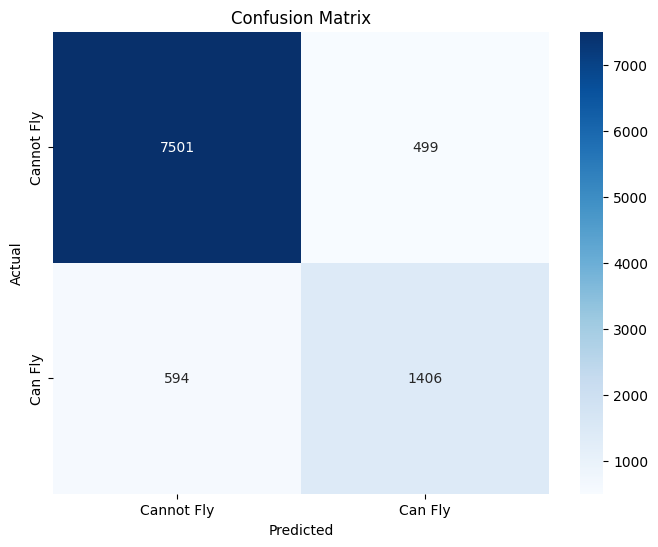

In [7]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Test the model

In [12]:
# Function to preprocess and predict a single image
def predict_single_image(img_path, model):
    # Re-importing image within the function scope
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Expand dimensions and normalize
    prediction = model.predict(img_array)
    label = 'Can Fly' if prediction > 0.5 else 'Cannot Fly'
    plt.imshow(img)
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

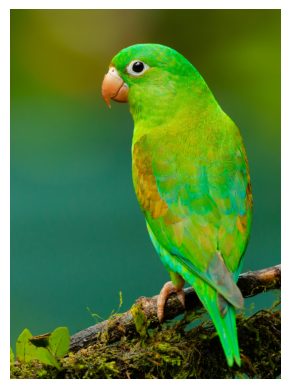

In [20]:
# Path to the image
img_path = '/content/sample_data/zdenek-machacek-OlKkCmToXEs-unsplash.jpg'

# Load and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


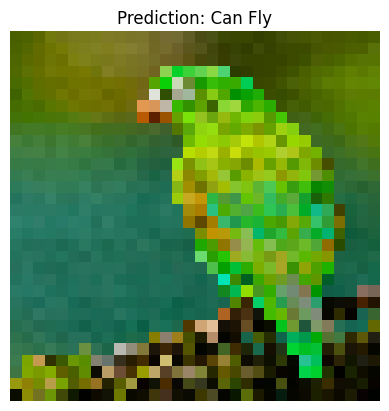

In [13]:
# Path to the image
img_path = '/content/sample_data/zdenek-machacek-OlKkCmToXEs-unsplash.jpg'

# Predict the given image
predict_single_image(img_path, model)

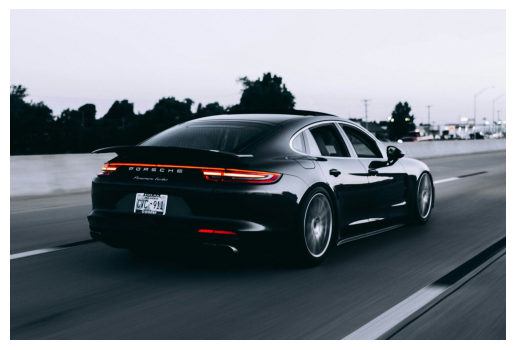

In [19]:

# Path to the image
img_path = '/content/sample_data/campbell-3ZUsNJhi_Ik-unsplash.jpg'

# Load and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


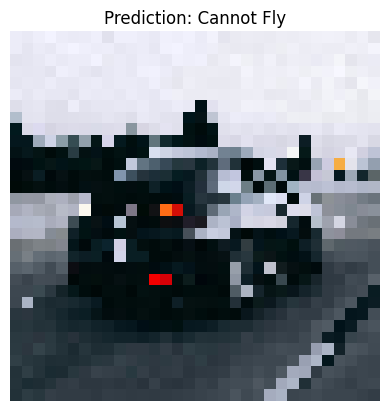

In [14]:
# Path to the image
img_path = '/content/sample_data/campbell-3ZUsNJhi_Ik-unsplash.jpg'

# Predict the given image
predict_single_image(img_path, model)

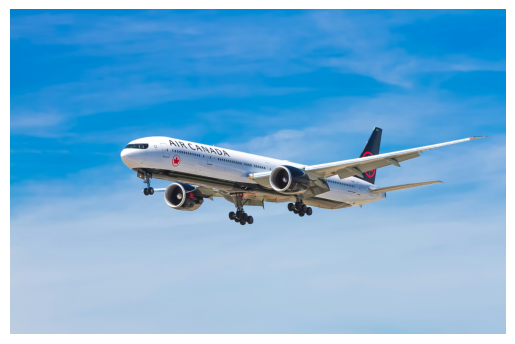

In [18]:


# Path to the image
img_path = '/content/sample_data/john-mcarthur-X_MOr6oa4-k-unsplash.jpg'

# Load and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


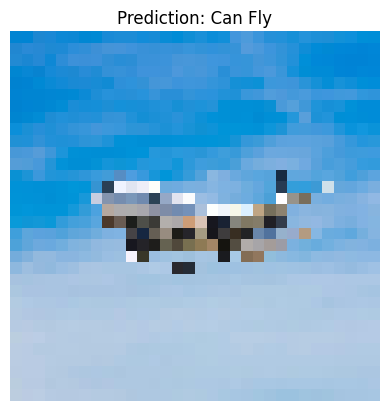

In [22]:
# Path to the image
img_path = '/content/sample_data/john-mcarthur-X_MOr6oa4-k-unsplash.jpg'

# Predict the given image
predict_single_image(img_path, model)
